<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Test-auto.arima-on-simulated-data" data-toc-modified-id="Test-auto.arima-on-simulated-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Test <code>auto.arima</code> on simulated data</a></span></li><li><span><a href="#Test-auto.arima-on-real-data" data-toc-modified-id="Test-auto.arima-on-real-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Test <code>auto.arima</code> on real data</a></span><ul class="toc-item"><li><span><a href="#A-subset-of-time-series" data-toc-modified-id="A-subset-of-time-series-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>A subset of time series</a></span></li><li><span><a href="#All-data" data-toc-modified-id="All-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>All data</a></span></li></ul></li></ul></div>

In [1]:
print(R.version)
file.path(R.home("bin"), "R")

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          3.0                         
year           2023                        
month          04                          
day            21                          
svn rev        84292                       
language       R                           
version.string R version 4.3.0 (2023-04-21)
nickname       Already Tomorrow            


[1] "/software/R/4.3.0/lib64/R/bin/R"

In [2]:
.libPaths()

[1] "/home/kzy816/R/x86_64-pc-linux-gnu-library/4.3"
[2] "/hpc/software/R/4.3.0/lib64/R/library"

# Test `auto.arima` on simulated data

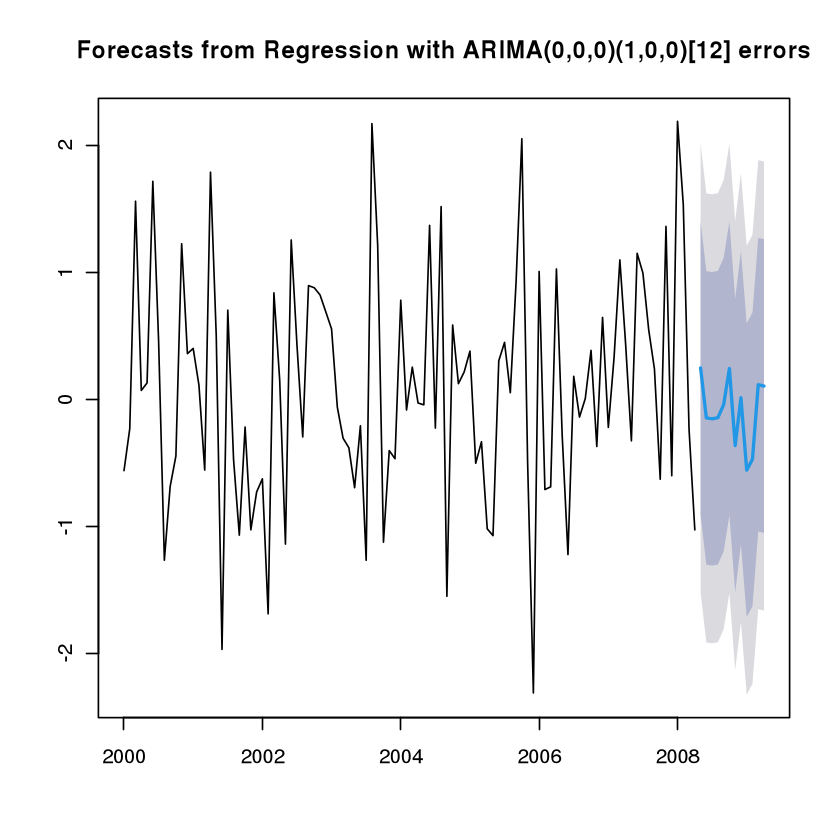

In [12]:
# Assuming 'forecast' package is installed and loaded
library(forecast)

# Simulate some time series data
set.seed(123)
ts_data <- ts(rnorm(100), frequency = 12, start = c(2000, 1))

# Simulate exogenous regressor data for model fitting
xreg_train <- matrix(rnorm(200), ncol = 2) # Two exogenous regressors

# Fit an ARIMA model with exogenous regressors
# fit <- auto.arima(ts_data, xreg = xreg_train)
fit <- auto.arima(ts_data, xreg = xreg_train)

# Simulate future values of the exogenous regressors for forecasting
xreg_future <- matrix(rnorm(24), ncol = 2) # Two exogenous regressors for 12 future periods

# Forecast using the model and future values of exogenous regressors
forecast_result <- forecast(fit, xreg = xreg_future)

# Plot the forecast
par(bg = 'white')
plot(forecast_result)

# Test `auto.arima` on real data

In [3]:
lib_dir = "/home/kzy816/R/x86_64-pc-linux-gnu-library/4.3/"

In [4]:
# install.packages("sandwich", lib = lib_dir)

In [5]:
require(xts)
require(sandwich)
require(lmtest)
require(forecast)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: lmtest

Loading required package: forecast

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [8]:
da = read.table("../AFTS_sol/data/d-ibm3dxwkdays8008.txt", header = T)
da[1:5,]

,year,mom,day,ibm,vw,ew,sp,M,T,W,R,F
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1980,1,2,-0.029126,-0.020089,-0.011686,-0.020196,0,0,1,0,0
2,1980,1,3,0.016000,-0.006510,-0.011628,-0.005106,0,0,0,1,0
3,1980,1,4,-0.001969,0.013735,0.015809,0.012355,0,0,0,0,1
4,1980,1,7,-0.003945,0.004368,0.007013,0.002722,1,0,0,0,0
5,1980,1,8,0.067327,0.019340,0.014152,0.020036,0,1,0,0,0


In [9]:
ew = da$ew * 100
ew_ts = ts(ew, frequency = 252, start = c(1980, 1, 2))

In [10]:
help(auto.arima)

## A subset of time series

In [16]:
da[6560:6570,]; da[6812:6822,]

,year,mom,day,ibm,vw,ew,sp,M,T,W,R,F
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
6560,2005,12,23,0.003124,0.000981,0.003363,0.000426,0,0,0,0,1
6561,2005,12,27,-0.005870,-0.009806,-0.007569,-0.009553,0,1,0,0,0
6562,2005,12,28,0.000603,0.002857,0.003299,0.001297,0,0,1,0,0
6563,2005,12,29,-0.007707,-0.002343,0.000072,-0.002981,0,0,0,1,0
6564,2005,12,30,-0.002427,-0.004415,0.000053,-0.004887,0,0,0,0,1
6565,2006,1,3,-0.001703,0.016428,0.010981,0.016430,0,1,0,0,0
6566,2006,1,4,-0.001340,0.005531,0.007697,0.003673,0,0,1,0,0
6567,2006,1,5,0.006711,-0.000332,0.002920,0.000016,0,0,0,1,0
6568,2006,1,6,0.029697,0.009813,0.009032,0.009399,0,0,0,0,1


,year,mom,day,ibm,vw,ew,sp,M,T,W,R,F
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
6812,2006,12,26,0.004305,0.004329,0.004140,0.004352,0,1,0,0,0
6813,2006,12,27,0.016099,0.007789,0.008718,0.007015,0,0,1,0,0
6814,2006,12,28,-0.002366,-0.001034,-0.000479,-0.001479,0,0,0,1,0
6815,2006,12,29,0.001856,-0.004519,-0.001187,-0.004513,0,0,0,0,1
6816,2007,1,3,0.001235,-0.001349,-0.000143,-0.001199,0,0,1,0,0
6817,2007,1,4,0.010692,0.000605,0.000588,0.001228,0,0,0,1,0
6818,2007,1,5,-0.009053,-0.007231,-0.009794,-0.006085,0,0,0,0,1
6819,2007,1,8,0.015192,0.002559,0.001731,0.002220,1,0,0,0,0
6820,2007,1,9,0.011830,-0.000023,0.000276,-0.000517,0,1,0,0,0


In [21]:
sub_ew_ts = ts(ew[6565:length(ew)], frequency = 252, start = c(2006, 1, 3))
sub_da = da[6565:length(ew),]
length(sub_ew_ts)

[1] 755

In [22]:
sub_ts_fm <- auto.arima(
    sub_ew_ts,
    d = 0,
    D = 0,
    max.p = 2,
    max.q = 2,
    max.P = 1,
    max.Q = 0,
    max.order = 5,
    seasonal = TRUE,
    method = "ML",
    allowmean = TRUE,
    xreg = as.matrix(sub_da[, 8:11]),
    stepwise = FALSE,
    parallel = TRUE,
    num.cores = 6
)
sub_ts_fm

Series: sub_ew_ts 
Regression with ARIMA(2,0,2) errors 

Coefficients:
          ar1      ar2     ma1     ma2        M       T        W       R
      -0.9976  -0.6214  1.0519  0.5740  -0.2183  0.0709  -0.0023  -0.060
s.e.   0.2445   0.2018  0.2520  0.2289   0.1147  0.1108   0.1099   0.111

sigma^2 = 2.013:  log likelihood = -1331.43
AIC=2680.87   AICc=2681.11   BIC=2722.51

## All data

In [ ]:
ts_fm <- auto.arima(
    ew_ts,
    d = 0,
    D = 0,
    max.p = 2,
    max.q = 2,
    max.P = 1,
    max.Q = 0,
    max.order = 5,
    seasonal = TRUE,
    method = "ML",
    allowmean = TRUE,
    xreg = as.matrix(da[, 8:11]),
    stepwise = FALSE,
    parallel = TRUE,
    num.cores = 12
)
ts_fm